## Preprocessing and Data Cleaning 

Here, I load the injuries dataset (injuries.csv) and the players's features datasets (players_1.csv and players_2.csv), clean them, join them and prepare the resulting dataset for analysis.  

In [98]:
import pandas as pd

In [99]:
# loading the injuries dataset

df_injuries = pd.read_csv('injuries.csv')

df_injuries.head()

,Date,Team,Acquired,Relinquised,Notes
0,10/3/10,Bulls,NaN,Carlos Boozer,fractured bone in right pinky finger (out inde...
1,10/6/10,Pistons,NaN,Jonas Jerebko,torn right Acchilles tendon (out indefinitely)
2,10/6/10,Pistons,NaN,Terrico White,broken fifth metatarsal in right foot (out ind...
3,10/8/10,Blazers,NaN,Jeff Ayres,torn ACL in right knee (out indefinitely)
4,10/8/10,Nets,NaN,Troy Murphy,strained lower back (out indefinitely)


In [100]:
# excluding the knee injuries from other injuries in the df_injuries dataframe

injuries_list = []
for i in range(len(df_injuries['Notes'].value_counts().index)):
    injuries_list.append(df_injuries['Notes'].value_counts().index[i])

injuries_mapping = {}
for i in range(len(df_injuries['Notes'].value_counts().index)):
    if 'knee' in df_injuries['Notes'].value_counts().index[i]:
        injuries_mapping.update({df_injuries['Notes'].value_counts().index[i]: \
                                 df_injuries['Notes'].value_counts().index[i]})
        
df_injuries['Notes'] = df_injuries.Notes.map(injuries_mapping)

df_injuries.drop(['Acquired', 'Team'], axis=1, inplace=True)

df_injuries.dropna(inplace=True)
df_injuries.reset_index(inplace=True)

df_injuries['injury_type'] = df_injuries['Notes']
df_injuries.drop(['index', 'Notes'], axis=1, inplace=True)
df_injuries.rename(columns={"Date": "date_of_injury", "Relinquised": "name"}, inplace=True)

df_injuries.head()

,date_of_injury,name,injury_type
0,10/8/10,Jeff Ayres,torn ACL in right knee (out indefinitely)
1,10/25/10,Nick Collison,left knee injury (out indefinitely)
2,10/28/10,Maurice Evans,right knee inflammation (DTD)
3,11/4/10,Elliot Williams,"dislocated patella in right knee (surgery, out..."
4,11/5/10,Marvin Williams,bone bruise in right knee (DNP)


In [101]:
# creating a list of players with knee injuries 

injured_player_full_names = df_injuries.groupby('name' )['injury_type'].count().reset_index()['name'].tolist()

In [102]:
# removing duplicate injuries 

duplicate_injuries_list = []
for player in injured_player_full_names:
    temp_df = df_injuries[df_injuries['name'] == player]
    for i in range(len(temp_df)):
        if i > 0:
            a = pd.to_datetime(temp_df.iloc[i-1]['date_of_injury'])
            b = pd.to_datetime(temp_df.iloc[i]['date_of_injury'])
            if (b-a).days < 20:
                duplicate_injuries_list.append(temp_df.iloc[i].name)
                
df_injuries.drop(duplicate_injuries_list, inplace=True)

df_injuries.head()

,date_of_injury,name,injury_type
0,10/8/10,Jeff Ayres,torn ACL in right knee (out indefinitely)
1,10/25/10,Nick Collison,left knee injury (out indefinitely)
2,10/28/10,Maurice Evans,right knee inflammation (DTD)
3,11/4/10,Elliot Williams,"dislocated patella in right knee (surgery, out..."
4,11/5/10,Marvin Williams,bone bruise in right knee (DNP)


In [103]:
# Extracting the year of the injury from the injuries dataframe 

df_injuries['year_of_injury'] = df_injuries.date_of_injury.apply(lambda x: x.split('/')[2])

df_injuries.head()

,date_of_injury,name,injury_type,year_of_injury
0,10/8/10,Jeff Ayres,torn ACL in right knee (out indefinitely),10
1,10/25/10,Nick Collison,left knee injury (out indefinitely),10
2,10/28/10,Maurice Evans,right knee inflammation (DTD),10
3,11/4/10,Elliot Williams,"dislocated patella in right knee (surgery, out...",10
4,11/5/10,Marvin Williams,bone bruise in right knee (DNP),10


In [104]:
# setting the injury columns for each year from 2010 to 2018 in the injuries dataframe
# 1 means injured, 0 means noy injured

df_injuries['injury_10'] = df_injuries.year_of_injury.apply(lambda x: 1 if x=='10' else 0)
df_injuries['injury_11'] = df_injuries.year_of_injury.apply(lambda x: 1 if x=='11' else 0)
df_injuries['injury_12'] = df_injuries.year_of_injury.apply(lambda x: 1 if x=='12' else 0)
df_injuries['injury_13'] = df_injuries.year_of_injury.apply(lambda x: 1 if x=='13' else 0)
df_injuries['injury_14'] = df_injuries.year_of_injury.apply(lambda x: 1 if x=='14' else 0)
df_injuries['injury_15'] = df_injuries.year_of_injury.apply(lambda x: 1 if x=='15' else 0)
df_injuries['injury_16'] = df_injuries.year_of_injury.apply(lambda x: 1 if x=='16' else 0)
df_injuries['injury_17'] = df_injuries.year_of_injury.apply(lambda x: 1 if x=='17' else 0)
df_injuries['injury_18'] = df_injuries.year_of_injury.apply(lambda x: 1 if x=='18' else 0)

In [105]:
# formatting the name in the df_injuries dataframe 

df_injuries['Name'] =\
df_injuries.name.apply(lambda x: x.split()[0][0]+x.split()[0][1]+' '+x.split()[1] \
if len(x.split()[0]) <= 2 else x.split()[0][0]+x.split()[0][1]+x.split()[0][2]+' '+x.split()[1])

df_injuries.head()

,date_of_injury,name,injury_type,year_of_injury,injury_10,injury_11,injury_12,injury_13,injury_14,injury_15,injury_16,injury_17,injury_18,Name
0,10/8/10,Jeff Ayres,torn ACL in right knee (out indefinitely),10,1,0,0,0,0,0,0,0,0,Jef Ayres
1,10/25/10,Nick Collison,left knee injury (out indefinitely),10,1,0,0,0,0,0,0,0,0,Nic Collison
2,10/28/10,Maurice Evans,right knee inflammation (DTD),10,1,0,0,0,0,0,0,0,0,Mau Evans
3,11/4/10,Elliot Williams,"dislocated patella in right knee (surgery, out...",10,1,0,0,0,0,0,0,0,0,Ell Williams
4,11/5/10,Marvin Williams,bone bruise in right knee (DNP),10,1,0,0,0,0,0,0,0,0,Mar Williams


In [106]:
# finding the number of appearances on the injury list for each player  in each year 

df_grouped_injuries = \
df_injuries.groupby('Name' )['injury_10', 'injury_11', 'injury_12','injury_13', \
                             'injury_14', 'injury_15', 'injury_16', 'injury_17', 'injury_18'].sum().reset_index()

df_grouped_injuries.head()

<ipython-input-106-ad9bcefe68e5>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_injuries.groupby('Name' )['injury_10', 'injury_11', 'injury_12','injury_13', \


,Name,injury_10,injury_11,injury_12,injury_13,injury_14,injury_15,injury_16,injury_17,injury_18
0,A.J Price,0,0,0,1,0,0,0,0,0
1,Aar Brooks,0,0,0,0,1,0,1,0,0
2,Al Harrington,0,0,2,1,0,0,0,0,0
3,Al Horford,0,0,0,0,0,0,0,0,1
4,Al Jefferson,0,0,0,0,0,2,0,0,0


In [107]:
# loading df_players_1 and df_players_2 dataframe 

df_players_1 = pd.read_csv('players_1.csv')
df_players_2 = pd.read_csv('players_2.csv')

df_players_1.drop(['Unnamed: 0', 'collage', 'born', 'birth_city', 'birth_state'], axis=1, inplace=True)
df_players_2.drop(['height', 'weight', 'college'], axis=1, inplace=True)

df_players_1.dropna(inplace=True)
df_players_1.reset_index(inplace=True)

df_players_2.dropna(inplace=True)
df_players_2.reset_index(inplace=True)

# creating a name column in players_1 dataset and players_2 dataset with the proper name format:  

df_players_1['Name'] = df_players_1.Player.apply(lambda x: x.split()[0][0]+x.split()[0][1]+' '+x.split()[1] \
if len(x.split()[0]) <= 2 else x.split()[0][0]+x.split()[0][1]+x.split()[0][2]+' '+x.split()[1])
df_players_2['Name'] = df_players_2.name.apply(lambda x: x.split()[0][0]+x.split()[0][1]+' '+x.split()[1] \
if len(x.split()[0]) <= 2 else x.split()[0][0]+x.split()[0][1]+x.split()[0][2]+' '+x.split()[1])

df_players_1.drop(['index', 'Player'], axis=1, inplace=True)
df_players_2.drop(['index', 'name'], axis=1, inplace=True)

df_players_2.head()

,year_start,year_end,position,birth_date,Name
0,1991,1995,F-C,24-Jun-68,Ala Abdelnaby
1,1969,1978,C-F,7-Apr-46,Zai Abdul-Aziz
2,1970,1989,C,16-Apr-47,Kar Abdul-Jabbar
3,1991,2001,G,9-Mar-69,Mah Abdul-Rauf
4,1998,2003,F,3-Nov-74,Tar Abdul-Wahad


In [108]:
# creating a list of injured players names with the proper format

injured_player_names = df_injuries.Name.unique()

In [109]:
injured_player_height = []
injured_player_weight = []
injured_player_year_start = []
injured_player_year_end = []
injured_player_position = []
injured_player_dob = []
injured_player_names_update = []

# creating lists of injured players/features/injuries to construct a single dataframe 

for i in range(len(injured_player_names)):
    if (injured_player_names[i] in df_players_1['Name'].tolist()) and \
    (injured_player_names[i] in df_players_2['Name'].tolist()):
        
        injured_player_names_update.append(injured_player_names[i])
        
        temp_index_1 = df_players_1.index[df_players_1['Name'] == injured_player_names[i]][0]
        temp_index_2 = df_players_2.index[df_players_2['Name'] == injured_player_names[i]][0]
        
        injured_player_height.append(df_players_1.iloc[temp_index_1]['height'])
        injured_player_weight.append(df_players_1.iloc[temp_index_1]['weight'])
        
        injured_player_year_start.append(df_players_2.iloc[temp_index_2]['year_start'])
        injured_player_year_end.append(df_players_2.iloc[temp_index_2]['year_end'])
        injured_player_position.append(df_players_2.iloc[temp_index_2]['position'])
        injured_player_dob.append(df_players_2.iloc[temp_index_2]['birth_date'])       

In [110]:
# creating a list including the number of injuries in each year for each player 

injured_player_injury_10 = []
injured_player_injury_11 = []
injured_player_injury_12 = []
injured_player_injury_13 = []
injured_player_injury_14 = []
injured_player_injury_15 = []
injured_player_injury_16 = []
injured_player_injury_17 = []
injured_player_injury_18 = []

for i in range(len(injured_player_names_update)):
    temp_index = df_grouped_injuries.index[df_grouped_injuries['Name'] == injured_player_names_update[i]][0]
    
    injured_player_injury_10.append(df_grouped_injuries.iloc[temp_index]['injury_10'])
    injured_player_injury_11.append(df_grouped_injuries.iloc[temp_index]['injury_11'])
    injured_player_injury_12.append(df_grouped_injuries.iloc[temp_index]['injury_12'])
    injured_player_injury_13.append(df_grouped_injuries.iloc[temp_index]['injury_13'])
    injured_player_injury_14.append(df_grouped_injuries.iloc[temp_index]['injury_14'])
    injured_player_injury_15.append(df_grouped_injuries.iloc[temp_index]['injury_15'])
    injured_player_injury_16.append(df_grouped_injuries.iloc[temp_index]['injury_16'])
    injured_player_injury_17.append(df_grouped_injuries.iloc[temp_index]['injury_17'])
    injured_player_injury_18.append(df_grouped_injuries.iloc[temp_index]['injury_18'])

In [111]:
# creating a list of uninjured players

uninjured_player_names = []

for i in range(df_players_2.shape[0]):
    if (df_players_2.iloc[i]['Name'] not in injured_player_names_update) \
    and (df_players_2.iloc[i]['year_end'] >= 2010) and \
    (df_players_2.iloc[i]['Name'] in df_players_1['Name'].tolist()):
        uninjured_player_names.append(df_players_2.iloc[i]['Name'])   
        
uninjured_player_height = []
uninjured_player_weight = []
uninjured_player_year_start = []
uninjured_player_year_end = []
uninjured_player_position = []
uninjured_player_dob = []

for i in range(len(uninjured_player_names)):
        temp_index_1 = df_players_1.index[df_players_1['Name'] == uninjured_player_names[i]][0]
        temp_index_2 = df_players_2.index[df_players_2['Name'] == uninjured_player_names[i]][0]
        
        uninjured_player_height.append(df_players_1.iloc[temp_index_1]['height'])
        uninjured_player_weight.append(df_players_1.iloc[temp_index_1]['weight'])
        
        uninjured_player_year_start.append(df_players_2.iloc[temp_index_2]['year_start'])
        uninjured_player_year_end.append(df_players_2.iloc[temp_index_2]['year_end'])
        uninjured_player_position.append(df_players_2.iloc[temp_index_2]['position'])
        uninjured_player_dob.append(df_players_2.iloc[temp_index_2]['birth_date'])
        
uninjured_player_injury_10 = [0 for i in range(len(uninjured_player_names))]
uninjured_player_injury_11 = [0 for i in range(len(uninjured_player_names))]
uninjured_player_injury_12 = [0 for i in range(len(uninjured_player_names))]
uninjured_player_injury_13 = [0 for i in range(len(uninjured_player_names))]
uninjured_player_injury_14 = [0 for i in range(len(uninjured_player_names))]
uninjured_player_injury_15 = [0 for i in range(len(uninjured_player_names))]
uninjured_player_injury_16 = [0 for i in range(len(uninjured_player_names))]
uninjured_player_injury_17 = [0 for i in range(len(uninjured_player_names))]
uninjured_player_injury_18 = [0 for i in range(len(uninjured_player_names))]

In [112]:
# creating a dictionary including all the injured and uninjured players data 

player_injury_dict = {'name': injured_player_names_update + uninjured_player_names ,\
                      'injury_10': injured_player_injury_10 + uninjured_player_injury_10, \
                      'injury_11': injured_player_injury_11 + uninjured_player_injury_11, \
                      'injury_12': injured_player_injury_12 + uninjured_player_injury_12, \
                      'injury_13': injured_player_injury_13 + uninjured_player_injury_13, \
                      'injury_14': injured_player_injury_14 + uninjured_player_injury_14, \
                      'injury_15': injured_player_injury_15 + uninjured_player_injury_15, \
                      'injury_16': injured_player_injury_16 + uninjured_player_injury_16, \
                      'injury_17': injured_player_injury_17 + uninjured_player_injury_17, \
                      'injury_18': injured_player_injury_18 + uninjured_player_injury_18, \
                      'height' : injured_player_height + uninjured_player_height, \
                      'weight' : injured_player_weight + uninjured_player_weight, \
                      'year_start' : injured_player_year_start + uninjured_player_year_start, \
                      'year_end' : injured_player_year_end + uninjured_player_year_end, \
                      'position' : injured_player_position + uninjured_player_position, \
                      'birth_date' : injured_player_dob + uninjured_player_dob}

In [113]:
# creating a single dataframe including all the injured and uninjured players data 

df_player_injury = pd.DataFrame.from_dict(player_injury_dict)

In [114]:
# Removing errorenous info

buggy_indexes = []
for i in range(df_player_injury.shape[0]):
    if df_player_injury.iloc[i]['year_end'] < 2010:
        buggy_indexes.append(i)

df_player_injury.drop(buggy_indexes, inplace=True)

df_player_injury.head()

,name,injury_10,injury_11,injury_12,injury_13,injury_14,injury_15,injury_16,injury_17,injury_18,height,weight,year_start,year_end,position,birth_date
0,Jef Ayres,1,0,1,0,0,0,0,0,0,188.0,83.0,2010,2016,F,29-Apr-87
1,Nic Collison,1,0,0,0,0,0,0,0,0,208.0,115.0,2005,2018,F,26-Oct-80
2,Mau Evans,1,0,0,0,0,0,0,0,0,196.0,99.0,2002,2012,G,8-Nov-78
3,Ell Williams,1,0,0,0,0,0,0,0,0,196.0,86.0,2012,2016,G,20-Jun-89
4,Mar Williams,1,0,1,0,1,0,0,0,0,185.0,89.0,2007,2010,G,3-Dec-85


In [115]:
# adding columns indicating whether or not a player played in a certain year 

df_player_injury['played_10'] = df_player_injury.apply(lambda row: 1 if (row['year_start']<=2010) and \
                                                       (row['year_end']>=2010) else 0, axis = 1)

df_player_injury['played_11'] = df_player_injury.apply(lambda row: 1 if (row['year_start']<=2011) and \
                                                       (row['year_end']>=2011) else 0, axis = 1)

df_player_injury['played_12'] = df_player_injury.apply(lambda row: 1 if (row['year_start']<=2012) and \
                                                       (row['year_end']>=2012) else 0, axis = 1)

df_player_injury['played_13'] = df_player_injury.apply(lambda row: 1 if (row['year_start']<=2013) and \
                                                       (row['year_end']>=2013) else 0, axis = 1)

df_player_injury['played_14'] = df_player_injury.apply(lambda row: 1 if (row['year_start']<=2014) and \
                                                       (row['year_end']>=2014) else 0, axis = 1)

df_player_injury['played_15'] = df_player_injury.apply(lambda row: 1 if (row['year_start']<=2015) and \
                                                       (row['year_end']>=2015) else 0, axis = 1)

df_player_injury['played_16'] = df_player_injury.apply(lambda row: 1 if (row['year_start']<=2016) and \
                                                       (row['year_end']>=2016) else 0, axis = 1)

df_player_injury['played_17'] = df_player_injury.apply(lambda row: 1 if (row['year_start']<=2017) and \
                                                       (row['year_end']>=2017) else 0, axis = 1)

df_player_injury['played_18'] = df_player_injury.apply(lambda row: 1 if (row['year_start']<=2018) and \
                                                       (row['year_end']>=2018) else 0, axis = 1)

In [116]:
# digitizing the position columns 

df_player_injury['G_position'] = df_player_injury.position.apply(lambda x: 1 if ('G' in x.split()) else 0)
df_player_injury['F_position'] = df_player_injury.position.apply(lambda x: 1 if ('F' in x.split()) else 0)
df_player_injury['C_position'] = df_player_injury.position.apply(lambda x: 1 if ('C' in x.split()) else 0)

In [117]:
# adding a column capturing the number of years played before 2010 

df_player_injury['years_played_before_2010'] = df_player_injury['year_start'].apply(lambda x: (2010-x) if x <2010 else 0)

In [118]:
# adding the age at 2010 column 

df_player_injury['year_of_birth'] = df_player_injury['birth_date'].apply(lambda x: 1900+int(x.split()[0][-2:]))
df_player_injury['age_at_2010'] = df_player_injury.year_of_birth.apply(lambda x: 2010-x)

df_player_injury.reset_index(inplace=True)

df_player_injury.head()

,index,name,injury_10,injury_11,injury_12,injury_13,injury_14,injury_15,injury_16,injury_17,...,played_15,played_16,played_17,played_18,G_position,F_position,C_position,years_played_before_2010,year_of_birth,age_at_2010
0,0,Jef Ayres,1,0,1,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1987,23
1,1,Nic Collison,1,0,0,0,0,0,0,0,...,1,1,1,1,0,1,0,5,1980,30
2,2,Mau Evans,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,8,1978,32
3,3,Ell Williams,1,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1989,21
4,4,Mar Williams,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,3,1985,25


Above is the merged dataset after cleaning and prepared for analysis. 

## Data Analysis 

Here, I show some interesting findings from the data.

(0.0, 12.0)

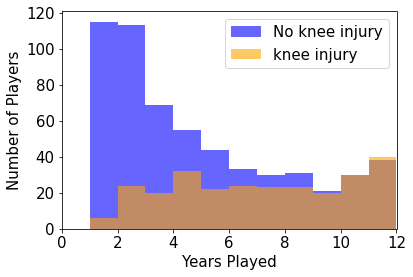

In [119]:
# visualizing the age distributions of number years played for both 
# injured and uninjured players -- one of the most important features  

injured_players_number_years_played = []
uninjured_players_number_years_played = []

df_player_injury['total_injuries'] = \
df_player_injury.apply(lambda row: row['injury_10']+row['injury_11']+row['injury_12']+\
                      row['injury_13']+row['injury_14']+row['injury_15']+row['injury_16']+\
                      row['injury_17']+row['injury_18'], axis=1)

for i in range(df_player_injury.shape[0]):
    if df_player_injury.iloc[i]['total_injuries'] > 0:
        number_years_played = df_player_injury.iloc[i]['year_end'] - \
        df_player_injury.iloc[i]['year_start']
        injured_players_number_years_played.append(number_years_played+1)
    else:
        number_years_played = df_player_injury.iloc[i]['year_end'] - \
        df_player_injury.iloc[i]['year_start']
        uninjured_players_number_years_played.append(number_years_played+1)
        
import matplotlib.pyplot as plt
plt.hist(uninjured_players_number_years_played, bins = [i+1 for i in range(12)], alpha = 0.6, label='No knee injury', color = 'blue')
plt.hist(injured_players_number_years_played, bins = [i+1 for i in range(12)], alpha=0.6, label='knee injury', color = 'orange')
plt.xlabel('Years Played')
plt.ylabel('Number of Players')
plt.legend(loc='upper right')
plt.rcParams.update({'font.size': 15})
plt.xlim((0, 12))

The plot shows that the median injured player has played four years longer than the median uninjured player.

Text(0.5, 1.0, 'Risk of injury/re-injury')

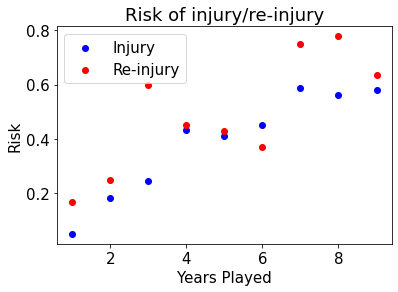

In [120]:
# visualizing the risk of injury vs. the risk of re-injury

df_player_injury['total_years_played'] = \
df_player_injury.apply(lambda row: row['played_10']+row['played_11']+row['played_12']+\
                      row['played_13']+row['played_14']+row['played_15']+row['played_16']+\
                      row['played_17']+row['played_18'], axis=1)

df_player_injury['total_number_injuries'] = \
df_player_injury.apply(lambda row: row['injury_10']+row['injury_11']+row['injury_12']+\
                      row['injury_13']+row['injury_14']+row['injury_15']+row['injury_16']+\
                      row['injury_17']+row['injury_18'], axis=1)

number_injuries_list = df_player_injury['total_number_injuries'].tolist()

years_played_list = df_player_injury['total_years_played'].tolist()

year_start_list = df_player_injury['year_start'].tolist()

injury_risk = []
re_injury_risk = []
for year in range(1, 10):
    all_counter = 0
    all_injured_counter = 0
    all_re_injured_counter = 0
    for i in range(len(number_injuries_list)):
        if years_played_list[i] == year and year_start_list[i] >= 2010 :
            all_counter += 1
            if (number_injuries_list[i] > 0):
                all_injured_counter += 1
            if (number_injuries_list[i] > 1):
                all_re_injured_counter += 1
                
    injury_risk.append(all_injured_counter/all_counter)
    re_injury_risk.append(all_re_injured_counter/all_injured_counter)
    
import matplotlib.pyplot as plt
plt.scatter(list(range(1, 10)), injury_risk, color = 'blue')
plt.scatter(list(range(1, 10)), re_injury_risk, color = 'red')
labels = ['Injury', 'Re-injury']
plt.rcParams.update({'font.size': 15})
plt.legend(labels) 
plt.xlabel('Years Played')
plt.ylabel('Risk')
plt.title('Risk of injury/re-injury')

The plot shows that the risk of re-injury is consitently higher than the risk of injury: if you get injured once, you are more likely to get injured again. 

## Modeling

Here, I build a Logistic Regression model for predicting who will have a knee injury. 

In [121]:
# modeling using stratified K-fold cross validation, regularization and upsampling with SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np  


x = df_player_injury[['height', 'weight', 'G_position', 'F_position', 'C_position', \
                             'years_played_before_2010', 'age_at_2010', 'injury_10', \
                             'injury_11', 'injury_12', 'injury_13', 'injury_14', 'injury_15', \
                             'injury_16', 'injury_17', 'played_10', 'played_11', 'played_12', \
                             'played_13', 'played_14', 'played_15', 'played_16', \
                             'played_17', 'played_18']]

df_player_injury['injury_18'] = df_player_injury.injury_18.apply(lambda x: 1 if x>0 else 0)

y = df_player_injury['injury_18']

# Normalizing the data 

scaler = StandardScaler()
x = scaler.fit_transform(x)

# K-fold stratified cross validation and upsampling the minority class

skf = StratifiedKFold(n_splits=6, random_state=1)

scores_per_tresh = []
treshholds = [i*0.01 for i in range(101)] 

for tresh in treshholds:
    
    scores_per_split = []
    
    for train_index, test_index in skf.split(x, y):

        x_train, x_test = x[train_index], x[test_index]
        y_train, y_test = y[train_index], y[test_index]

        sm = SMOTE(random_state=2)
        x_train, y_train = sm.fit_sample(x_train, y_train)

        # Training the model
        
        model = LogisticRegression(solver = 'lbfgs')
        model.fit(x_train, y_train)

        # predicting the class of the test set datapoints 
        
        probabilities = model.predict_proba(x_test)
        y_predict = []
        for j in range(len(x_test)):
            if probabilities[j][1] > tresh:
                y_predict.append(1)
            else:
                y_predict.append(0)

        scores_per_split.append(metrics.f1_score(y_test, y_predict))
    
    scores_per_tresh.append(np.mean(scores_per_split))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Since we want to minimize both false positives and false negatives, I use F-1 score to measure performance. I compare the performance of the algorithm with random guess. 

In [122]:
# compting f-1 score of random guessing

import random

guess_scores_per_split = []

for train_index, test_index in skf.split(x, y):

    y_test = y[test_index]
         
    n_guess_trial = 1000
    guess_score = 0
    for i in range(n_guess_trial):
        y_guess = []        
        for j in range(len(y_test)):
            if random.uniform(0, 1) > 0.5:
                y_guess.append(1)
            else:
                y_guess.append(0)
        guess_score += metrics.f1_score(y_test, y_guess)
    guess_score = guess_score/n_guess_trial

    guess_scores_per_split.append(guess_score)

guess_score = np.mean(guess_scores_per_split)    

Text(0.5, 1.0, 'Model Performance')

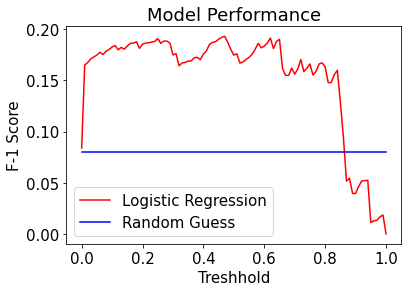

In [123]:
# visualizing the model performance 

plt.plot(treshholds, scores_per_tresh, color = 'red')
plt.plot(treshholds, [guess_score for i in range(len(treshholds))], color = 'blue')
labels = ['Logistic Regression', 'Random Guess']
plt.rcParams.update({'font.size': 15})
plt.legend(labels) 
plt.xlabel('Treshhold')
plt.ylabel('F-1 Score')
plt.title('Model Performance')

At optimal threshhold, the model performs 2.5x better than random guess. That is a good outcome for our first iteration!

In [124]:
df_player_injury.to_csv('players_injury_df.csv')